## 4.3　改良版 word2vec の学習

In [1]:
import os
import sys
import numpy as np

In [2]:
os.chdir('/Users/yuta.shimizu/Downloads/ML/deep-learning-from-scratch-2-master/ch01')
sys.path.append(os.pardir)

In [3]:
import pickle
from common.layers import Embedding
from ch04.negative_sampling_layer import NegativeSamplingLoss
from common import config
from common.trainer import Trainer
from common.optimizer import Adam
from ch04.cbow import CBOW
from common.util import create_contexts_target, to_cpu
from dataset import ptb

### 4.3.1　CBOW モデルの実装

`window_size` は、左右の単語を何個までコンテキストにするかを決める引数である。

In [4]:
class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(V, H).astype('f')
        
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in)
            self.in_layers.append(layer)
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)
        
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h += 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        return loss
    
    def backward(self, dout=1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout)
        return None

イニシャライザでは、`layer` に `Embedding`、`self.ns_loss` に `NegativeSamplingLoss` を代入している。

### 4.3.2　CBOW モデルの学習コード

In [5]:
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

In [6]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)

| epoch 1 |  iter 1 / 9295 | time 0[s] | loss 4.16
| epoch 1 |  iter 21 / 9295 | time 0[s] | loss 4.10
| epoch 1 |  iter 41 / 9295 | time 1[s] | loss 3.90
| epoch 1 |  iter 61 / 9295 | time 2[s] | loss 3.58
| epoch 1 |  iter 81 / 9295 | time 2[s] | loss 3.29
| epoch 1 |  iter 101 / 9295 | time 3[s] | loss 3.11
| epoch 1 |  iter 121 / 9295 | time 4[s] | loss 2.98
| epoch 1 |  iter 141 / 9295 | time 4[s] | loss 2.88
| epoch 1 |  iter 161 / 9295 | time 5[s] | loss 2.83
| epoch 1 |  iter 181 / 9295 | time 5[s] | loss 2.80
| epoch 1 |  iter 201 / 9295 | time 6[s] | loss 2.80
| epoch 1 |  iter 221 / 9295 | time 7[s] | loss 2.75
| epoch 1 |  iter 241 / 9295 | time 7[s] | loss 2.73
| epoch 1 |  iter 261 / 9295 | time 8[s] | loss 2.70
| epoch 1 |  iter 281 / 9295 | time 9[s] | loss 2.68
| epoch 1 |  iter 301 / 9295 | time 9[s] | loss 2.66
| epoch 1 |  iter 321 / 9295 | time 10[s] | loss 2.67
| epoch 1 |  iter 341 / 9295 | time 11[s] | loss 2.62
| epoch 1 |  iter 361 / 9295 | time 11[s] | loss 2

| epoch 1 |  iter 3021 / 9295 | time 99[s] | loss 2.19
| epoch 1 |  iter 3041 / 9295 | time 100[s] | loss 2.21
| epoch 1 |  iter 3061 / 9295 | time 100[s] | loss 2.21
| epoch 1 |  iter 3081 / 9295 | time 101[s] | loss 2.22
| epoch 1 |  iter 3101 / 9295 | time 102[s] | loss 2.21
| epoch 1 |  iter 3121 / 9295 | time 102[s] | loss 2.19
| epoch 1 |  iter 3141 / 9295 | time 103[s] | loss 2.24
| epoch 1 |  iter 3161 / 9295 | time 104[s] | loss 2.20
| epoch 1 |  iter 3181 / 9295 | time 104[s] | loss 2.18
| epoch 1 |  iter 3201 / 9295 | time 105[s] | loss 2.19
| epoch 1 |  iter 3221 / 9295 | time 106[s] | loss 2.17
| epoch 1 |  iter 3241 / 9295 | time 106[s] | loss 2.21
| epoch 1 |  iter 3261 / 9295 | time 107[s] | loss 2.22
| epoch 1 |  iter 3281 / 9295 | time 108[s] | loss 2.20
| epoch 1 |  iter 3301 / 9295 | time 108[s] | loss 2.20
| epoch 1 |  iter 3321 / 9295 | time 109[s] | loss 2.18
| epoch 1 |  iter 3341 / 9295 | time 110[s] | loss 2.21
| epoch 1 |  iter 3361 / 9295 | time 110[s] | los

| epoch 1 |  iter 5961 / 9295 | time 196[s] | loss 2.00
| epoch 1 |  iter 5981 / 9295 | time 197[s] | loss 2.07
| epoch 1 |  iter 6001 / 9295 | time 198[s] | loss 2.06
| epoch 1 |  iter 6021 / 9295 | time 198[s] | loss 2.03
| epoch 1 |  iter 6041 / 9295 | time 199[s] | loss 2.07
| epoch 1 |  iter 6061 / 9295 | time 200[s] | loss 2.04
| epoch 1 |  iter 6081 / 9295 | time 200[s] | loss 2.01
| epoch 1 |  iter 6101 / 9295 | time 201[s] | loss 2.03
| epoch 1 |  iter 6121 / 9295 | time 202[s] | loss 2.04
| epoch 1 |  iter 6141 / 9295 | time 202[s] | loss 2.08
| epoch 1 |  iter 6161 / 9295 | time 203[s] | loss 2.03
| epoch 1 |  iter 6181 / 9295 | time 204[s] | loss 2.04
| epoch 1 |  iter 6201 / 9295 | time 204[s] | loss 2.00
| epoch 1 |  iter 6221 / 9295 | time 205[s] | loss 2.02
| epoch 1 |  iter 6241 / 9295 | time 206[s] | loss 2.06
| epoch 1 |  iter 6261 / 9295 | time 206[s] | loss 2.02
| epoch 1 |  iter 6281 / 9295 | time 207[s] | loss 2.02
| epoch 1 |  iter 6301 / 9295 | time 208[s] | lo

| epoch 1 |  iter 8901 / 9295 | time 294[s] | loss 1.95
| epoch 1 |  iter 8921 / 9295 | time 295[s] | loss 1.97
| epoch 1 |  iter 8941 / 9295 | time 295[s] | loss 2.00
| epoch 1 |  iter 8961 / 9295 | time 296[s] | loss 2.00
| epoch 1 |  iter 8981 / 9295 | time 297[s] | loss 1.90
| epoch 1 |  iter 9001 / 9295 | time 297[s] | loss 1.93
| epoch 1 |  iter 9021 / 9295 | time 298[s] | loss 1.92
| epoch 1 |  iter 9041 / 9295 | time 299[s] | loss 1.91
| epoch 1 |  iter 9061 / 9295 | time 299[s] | loss 1.92
| epoch 1 |  iter 9081 / 9295 | time 300[s] | loss 1.95
| epoch 1 |  iter 9101 / 9295 | time 301[s] | loss 1.94
| epoch 1 |  iter 9121 / 9295 | time 301[s] | loss 1.98
| epoch 1 |  iter 9141 / 9295 | time 302[s] | loss 1.93
| epoch 1 |  iter 9161 / 9295 | time 303[s] | loss 1.94
| epoch 1 |  iter 9181 / 9295 | time 304[s] | loss 1.94
| epoch 1 |  iter 9201 / 9295 | time 304[s] | loss 1.89
| epoch 1 |  iter 9221 / 9295 | time 305[s] | loss 1.92
| epoch 1 |  iter 9241 / 9295 | time 306[s] | lo

| epoch 2 |  iter 2561 / 9295 | time 393[s] | loss 1.73
| epoch 2 |  iter 2581 / 9295 | time 393[s] | loss 1.77
| epoch 2 |  iter 2601 / 9295 | time 394[s] | loss 1.81
| epoch 2 |  iter 2621 / 9295 | time 395[s] | loss 1.76
| epoch 2 |  iter 2641 / 9295 | time 395[s] | loss 1.74
| epoch 2 |  iter 2661 / 9295 | time 396[s] | loss 1.81
| epoch 2 |  iter 2681 / 9295 | time 397[s] | loss 1.81
| epoch 2 |  iter 2701 / 9295 | time 397[s] | loss 1.78
| epoch 2 |  iter 2721 / 9295 | time 398[s] | loss 1.84
| epoch 2 |  iter 2741 / 9295 | time 399[s] | loss 1.76
| epoch 2 |  iter 2761 / 9295 | time 399[s] | loss 1.80
| epoch 2 |  iter 2781 / 9295 | time 400[s] | loss 1.76
| epoch 2 |  iter 2801 / 9295 | time 401[s] | loss 1.78
| epoch 2 |  iter 2821 / 9295 | time 401[s] | loss 1.79
| epoch 2 |  iter 2841 / 9295 | time 402[s] | loss 1.72
| epoch 2 |  iter 2861 / 9295 | time 403[s] | loss 1.84
| epoch 2 |  iter 2881 / 9295 | time 403[s] | loss 1.76
| epoch 2 |  iter 2901 / 9295 | time 404[s] | lo

| epoch 2 |  iter 5501 / 9295 | time 491[s] | loss 1.77
| epoch 2 |  iter 5521 / 9295 | time 492[s] | loss 1.79
| epoch 2 |  iter 5541 / 9295 | time 493[s] | loss 1.70
| epoch 2 |  iter 5561 / 9295 | time 493[s] | loss 1.78
| epoch 2 |  iter 5581 / 9295 | time 494[s] | loss 1.75
| epoch 2 |  iter 5601 / 9295 | time 495[s] | loss 1.80
| epoch 2 |  iter 5621 / 9295 | time 495[s] | loss 1.78
| epoch 2 |  iter 5641 / 9295 | time 496[s] | loss 1.76
| epoch 2 |  iter 5661 / 9295 | time 497[s] | loss 1.78
| epoch 2 |  iter 5681 / 9295 | time 497[s] | loss 1.77
| epoch 2 |  iter 5701 / 9295 | time 498[s] | loss 1.78
| epoch 2 |  iter 5721 / 9295 | time 499[s] | loss 1.75
| epoch 2 |  iter 5741 / 9295 | time 499[s] | loss 1.74
| epoch 2 |  iter 5761 / 9295 | time 500[s] | loss 1.75
| epoch 2 |  iter 5781 / 9295 | time 501[s] | loss 1.73
| epoch 2 |  iter 5801 / 9295 | time 501[s] | loss 1.79
| epoch 2 |  iter 5821 / 9295 | time 502[s] | loss 1.76
| epoch 2 |  iter 5841 / 9295 | time 503[s] | lo

| epoch 2 |  iter 8441 / 9295 | time 590[s] | loss 1.73
| epoch 2 |  iter 8461 / 9295 | time 591[s] | loss 1.79
| epoch 2 |  iter 8481 / 9295 | time 591[s] | loss 1.75
| epoch 2 |  iter 8501 / 9295 | time 592[s] | loss 1.71
| epoch 2 |  iter 8521 / 9295 | time 593[s] | loss 1.71
| epoch 2 |  iter 8541 / 9295 | time 593[s] | loss 1.73
| epoch 2 |  iter 8561 / 9295 | time 594[s] | loss 1.79
| epoch 2 |  iter 8581 / 9295 | time 595[s] | loss 1.75
| epoch 2 |  iter 8601 / 9295 | time 595[s] | loss 1.75
| epoch 2 |  iter 8621 / 9295 | time 596[s] | loss 1.75
| epoch 2 |  iter 8641 / 9295 | time 597[s] | loss 1.78
| epoch 2 |  iter 8661 / 9295 | time 597[s] | loss 1.76
| epoch 2 |  iter 8681 / 9295 | time 598[s] | loss 1.75
| epoch 2 |  iter 8701 / 9295 | time 599[s] | loss 1.71
| epoch 2 |  iter 8721 / 9295 | time 599[s] | loss 1.75
| epoch 2 |  iter 8741 / 9295 | time 600[s] | loss 1.77
| epoch 2 |  iter 8761 / 9295 | time 601[s] | loss 1.73
| epoch 2 |  iter 8781 / 9295 | time 601[s] | lo

| epoch 3 |  iter 2101 / 9295 | time 688[s] | loss 1.56
| epoch 3 |  iter 2121 / 9295 | time 689[s] | loss 1.59
| epoch 3 |  iter 2141 / 9295 | time 690[s] | loss 1.61
| epoch 3 |  iter 2161 / 9295 | time 690[s] | loss 1.62
| epoch 3 |  iter 2181 / 9295 | time 691[s] | loss 1.55
| epoch 3 |  iter 2201 / 9295 | time 692[s] | loss 1.56
| epoch 3 |  iter 2221 / 9295 | time 692[s] | loss 1.58
| epoch 3 |  iter 2241 / 9295 | time 693[s] | loss 1.60
| epoch 3 |  iter 2261 / 9295 | time 694[s] | loss 1.59
| epoch 3 |  iter 2281 / 9295 | time 694[s] | loss 1.54
| epoch 3 |  iter 2301 / 9295 | time 695[s] | loss 1.58
| epoch 3 |  iter 2321 / 9295 | time 696[s] | loss 1.62
| epoch 3 |  iter 2341 / 9295 | time 697[s] | loss 1.59
| epoch 3 |  iter 2361 / 9295 | time 697[s] | loss 1.58
| epoch 3 |  iter 2381 / 9295 | time 698[s] | loss 1.58
| epoch 3 |  iter 2401 / 9295 | time 699[s] | loss 1.55
| epoch 3 |  iter 2421 / 9295 | time 699[s] | loss 1.59
| epoch 3 |  iter 2441 / 9295 | time 700[s] | lo

| epoch 3 |  iter 5041 / 9295 | time 787[s] | loss 1.62
| epoch 3 |  iter 5061 / 9295 | time 787[s] | loss 1.59
| epoch 3 |  iter 5081 / 9295 | time 788[s] | loss 1.62
| epoch 3 |  iter 5101 / 9295 | time 789[s] | loss 1.57
| epoch 3 |  iter 5121 / 9295 | time 789[s] | loss 1.58
| epoch 3 |  iter 5141 / 9295 | time 790[s] | loss 1.59
| epoch 3 |  iter 5161 / 9295 | time 791[s] | loss 1.58
| epoch 3 |  iter 5181 / 9295 | time 791[s] | loss 1.60
| epoch 3 |  iter 5201 / 9295 | time 792[s] | loss 1.59
| epoch 3 |  iter 5221 / 9295 | time 793[s] | loss 1.57
| epoch 3 |  iter 5241 / 9295 | time 793[s] | loss 1.56
| epoch 3 |  iter 5261 / 9295 | time 794[s] | loss 1.60
| epoch 3 |  iter 5281 / 9295 | time 795[s] | loss 1.59
| epoch 3 |  iter 5301 / 9295 | time 795[s] | loss 1.61
| epoch 3 |  iter 5321 / 9295 | time 796[s] | loss 1.59
| epoch 3 |  iter 5341 / 9295 | time 797[s] | loss 1.58
| epoch 3 |  iter 5361 / 9295 | time 797[s] | loss 1.61
| epoch 3 |  iter 5381 / 9295 | time 798[s] | lo

| epoch 3 |  iter 7981 / 9295 | time 884[s] | loss 1.57
| epoch 3 |  iter 8001 / 9295 | time 885[s] | loss 1.61
| epoch 3 |  iter 8021 / 9295 | time 886[s] | loss 1.61
| epoch 3 |  iter 8041 / 9295 | time 886[s] | loss 1.60
| epoch 3 |  iter 8061 / 9295 | time 887[s] | loss 1.60
| epoch 3 |  iter 8081 / 9295 | time 888[s] | loss 1.58
| epoch 3 |  iter 8101 / 9295 | time 888[s] | loss 1.57
| epoch 3 |  iter 8121 / 9295 | time 889[s] | loss 1.59
| epoch 3 |  iter 8141 / 9295 | time 890[s] | loss 1.59
| epoch 3 |  iter 8161 / 9295 | time 890[s] | loss 1.59
| epoch 3 |  iter 8181 / 9295 | time 891[s] | loss 1.57
| epoch 3 |  iter 8201 / 9295 | time 892[s] | loss 1.63
| epoch 3 |  iter 8221 / 9295 | time 892[s] | loss 1.60
| epoch 3 |  iter 8241 / 9295 | time 893[s] | loss 1.62
| epoch 3 |  iter 8261 / 9295 | time 894[s] | loss 1.60
| epoch 3 |  iter 8281 / 9295 | time 894[s] | loss 1.62
| epoch 3 |  iter 8301 / 9295 | time 895[s] | loss 1.64
| epoch 3 |  iter 8321 / 9295 | time 896[s] | lo

| epoch 4 |  iter 1641 / 9295 | time 982[s] | loss 1.43
| epoch 4 |  iter 1661 / 9295 | time 983[s] | loss 1.45
| epoch 4 |  iter 1681 / 9295 | time 983[s] | loss 1.43
| epoch 4 |  iter 1701 / 9295 | time 984[s] | loss 1.45
| epoch 4 |  iter 1721 / 9295 | time 985[s] | loss 1.44
| epoch 4 |  iter 1741 / 9295 | time 985[s] | loss 1.41
| epoch 4 |  iter 1761 / 9295 | time 986[s] | loss 1.43
| epoch 4 |  iter 1781 / 9295 | time 987[s] | loss 1.43
| epoch 4 |  iter 1801 / 9295 | time 987[s] | loss 1.43
| epoch 4 |  iter 1821 / 9295 | time 988[s] | loss 1.44
| epoch 4 |  iter 1841 / 9295 | time 989[s] | loss 1.45
| epoch 4 |  iter 1861 / 9295 | time 989[s] | loss 1.44
| epoch 4 |  iter 1881 / 9295 | time 990[s] | loss 1.41
| epoch 4 |  iter 1901 / 9295 | time 991[s] | loss 1.42
| epoch 4 |  iter 1921 / 9295 | time 991[s] | loss 1.45
| epoch 4 |  iter 1941 / 9295 | time 992[s] | loss 1.44
| epoch 4 |  iter 1961 / 9295 | time 993[s] | loss 1.44
| epoch 4 |  iter 1981 / 9295 | time 993[s] | lo

| epoch 4 |  iter 4541 / 9295 | time 1078[s] | loss 1.46
| epoch 4 |  iter 4561 / 9295 | time 1078[s] | loss 1.50
| epoch 4 |  iter 4581 / 9295 | time 1079[s] | loss 1.45
| epoch 4 |  iter 4601 / 9295 | time 1080[s] | loss 1.40
| epoch 4 |  iter 4621 / 9295 | time 1080[s] | loss 1.45
| epoch 4 |  iter 4641 / 9295 | time 1081[s] | loss 1.47
| epoch 4 |  iter 4661 / 9295 | time 1082[s] | loss 1.48
| epoch 4 |  iter 4681 / 9295 | time 1082[s] | loss 1.44
| epoch 4 |  iter 4701 / 9295 | time 1083[s] | loss 1.45
| epoch 4 |  iter 4721 / 9295 | time 1084[s] | loss 1.44
| epoch 4 |  iter 4741 / 9295 | time 1084[s] | loss 1.43
| epoch 4 |  iter 4761 / 9295 | time 1085[s] | loss 1.47
| epoch 4 |  iter 4781 / 9295 | time 1086[s] | loss 1.47
| epoch 4 |  iter 4801 / 9295 | time 1086[s] | loss 1.47
| epoch 4 |  iter 4821 / 9295 | time 1087[s] | loss 1.47
| epoch 4 |  iter 4841 / 9295 | time 1088[s] | loss 1.45
| epoch 4 |  iter 4861 / 9295 | time 1088[s] | loss 1.46
| epoch 4 |  iter 4881 / 9295 |

| epoch 4 |  iter 7421 / 9295 | time 1328[s] | loss 1.45
| epoch 4 |  iter 7441 / 9295 | time 1329[s] | loss 1.47
| epoch 4 |  iter 7461 / 9295 | time 1329[s] | loss 1.46
| epoch 4 |  iter 7481 / 9295 | time 1330[s] | loss 1.45
| epoch 4 |  iter 7501 / 9295 | time 1331[s] | loss 1.50
| epoch 4 |  iter 7521 / 9295 | time 1331[s] | loss 1.45
| epoch 4 |  iter 7541 / 9295 | time 1332[s] | loss 1.49
| epoch 4 |  iter 7561 / 9295 | time 1333[s] | loss 1.46
| epoch 4 |  iter 7581 / 9295 | time 1333[s] | loss 1.44
| epoch 4 |  iter 7601 / 9295 | time 1334[s] | loss 1.47
| epoch 4 |  iter 7621 / 9295 | time 1334[s] | loss 1.48
| epoch 4 |  iter 7641 / 9295 | time 1335[s] | loss 1.50
| epoch 4 |  iter 7661 / 9295 | time 1336[s] | loss 1.46
| epoch 4 |  iter 7681 / 9295 | time 1336[s] | loss 1.50
| epoch 4 |  iter 7701 / 9295 | time 1337[s] | loss 1.47
| epoch 4 |  iter 7721 / 9295 | time 1338[s] | loss 1.51
| epoch 4 |  iter 7741 / 9295 | time 1338[s] | loss 1.49
| epoch 4 |  iter 7761 / 9295 |

| epoch 5 |  iter 1021 / 9295 | time 2428[s] | loss 1.30
| epoch 5 |  iter 1041 / 9295 | time 2429[s] | loss 1.26
| epoch 5 |  iter 1061 / 9295 | time 2429[s] | loss 1.34
| epoch 5 |  iter 1081 / 9295 | time 2430[s] | loss 1.31
| epoch 5 |  iter 1101 / 9295 | time 2431[s] | loss 1.37
| epoch 5 |  iter 1121 / 9295 | time 3353[s] | loss 1.33
| epoch 5 |  iter 1141 / 9295 | time 3353[s] | loss 1.35
| epoch 5 |  iter 1161 / 9295 | time 3354[s] | loss 1.34
| epoch 5 |  iter 1181 / 9295 | time 3354[s] | loss 1.34
| epoch 5 |  iter 1201 / 9295 | time 3355[s] | loss 1.35
| epoch 5 |  iter 1221 / 9295 | time 3356[s] | loss 1.33
| epoch 5 |  iter 1241 / 9295 | time 3356[s] | loss 1.34
| epoch 5 |  iter 1261 / 9295 | time 3357[s] | loss 1.30
| epoch 5 |  iter 1281 / 9295 | time 3358[s] | loss 1.31
| epoch 5 |  iter 1301 / 9295 | time 4358[s] | loss 1.30
| epoch 5 |  iter 1321 / 9295 | time 4358[s] | loss 1.32
| epoch 5 |  iter 1341 / 9295 | time 4359[s] | loss 1.31
| epoch 5 |  iter 1361 / 9295 |

| epoch 5 |  iter 3901 / 9295 | time 4535[s] | loss 1.39
| epoch 5 |  iter 3921 / 9295 | time 4535[s] | loss 1.40
| epoch 5 |  iter 3941 / 9295 | time 4536[s] | loss 1.37
| epoch 5 |  iter 3961 / 9295 | time 4537[s] | loss 1.36
| epoch 5 |  iter 3981 / 9295 | time 4537[s] | loss 1.37
| epoch 5 |  iter 4001 / 9295 | time 4538[s] | loss 1.33
| epoch 5 |  iter 4021 / 9295 | time 4539[s] | loss 1.36
| epoch 5 |  iter 4041 / 9295 | time 4539[s] | loss 1.31
| epoch 5 |  iter 4061 / 9295 | time 4540[s] | loss 1.36
| epoch 5 |  iter 4081 / 9295 | time 4541[s] | loss 1.39
| epoch 5 |  iter 4101 / 9295 | time 4541[s] | loss 1.33
| epoch 5 |  iter 4121 / 9295 | time 4542[s] | loss 1.35
| epoch 5 |  iter 4141 / 9295 | time 4543[s] | loss 1.40
| epoch 5 |  iter 4161 / 9295 | time 4543[s] | loss 1.36
| epoch 5 |  iter 4181 / 9295 | time 4544[s] | loss 1.35
| epoch 5 |  iter 4201 / 9295 | time 4545[s] | loss 1.41
| epoch 5 |  iter 4221 / 9295 | time 4545[s] | loss 1.39
| epoch 5 |  iter 4241 / 9295 |

| epoch 5 |  iter 6781 / 9295 | time 12710[s] | loss 1.42
| epoch 5 |  iter 6801 / 9295 | time 12710[s] | loss 1.39
| epoch 5 |  iter 6821 / 9295 | time 12711[s] | loss 1.41
| epoch 5 |  iter 6841 / 9295 | time 13741[s] | loss 1.39
| epoch 5 |  iter 6861 / 9295 | time 13742[s] | loss 1.40
| epoch 5 |  iter 6881 / 9295 | time 13743[s] | loss 1.43
| epoch 5 |  iter 6901 / 9295 | time 13743[s] | loss 1.43
| epoch 5 |  iter 6921 / 9295 | time 13744[s] | loss 1.39
| epoch 5 |  iter 6941 / 9295 | time 13745[s] | loss 1.40
| epoch 5 |  iter 6961 / 9295 | time 13745[s] | loss 1.41
| epoch 5 |  iter 6981 / 9295 | time 13746[s] | loss 1.37
| epoch 5 |  iter 7001 / 9295 | time 13747[s] | loss 1.40
| epoch 5 |  iter 7021 / 9295 | time 14747[s] | loss 1.40
| epoch 5 |  iter 7041 / 9295 | time 14747[s] | loss 1.38
| epoch 5 |  iter 7061 / 9295 | time 14748[s] | loss 1.36
| epoch 5 |  iter 7081 / 9295 | time 14749[s] | loss 1.42
| epoch 5 |  iter 7101 / 9295 | time 14749[s] | loss 1.37
| epoch 5 |  i

| epoch 6 |  iter 321 / 9295 | time 15368[s] | loss 1.23
| epoch 6 |  iter 341 / 9295 | time 15369[s] | loss 1.22
| epoch 6 |  iter 361 / 9295 | time 15369[s] | loss 1.27
| epoch 6 |  iter 381 / 9295 | time 15370[s] | loss 1.24
| epoch 6 |  iter 401 / 9295 | time 15371[s] | loss 1.22
| epoch 6 |  iter 421 / 9295 | time 15371[s] | loss 1.20
| epoch 6 |  iter 441 / 9295 | time 15372[s] | loss 1.24
| epoch 6 |  iter 461 / 9295 | time 15373[s] | loss 1.25
| epoch 6 |  iter 481 / 9295 | time 15373[s] | loss 1.24
| epoch 6 |  iter 501 / 9295 | time 15374[s] | loss 1.20
| epoch 6 |  iter 521 / 9295 | time 15375[s] | loss 1.24
| epoch 6 |  iter 541 / 9295 | time 15375[s] | loss 1.22
| epoch 6 |  iter 561 / 9295 | time 15376[s] | loss 1.21
| epoch 6 |  iter 581 / 9295 | time 15377[s] | loss 1.22
| epoch 6 |  iter 601 / 9295 | time 15377[s] | loss 1.22
| epoch 6 |  iter 621 / 9295 | time 15378[s] | loss 1.26
| epoch 6 |  iter 641 / 9295 | time 15379[s] | loss 1.25
| epoch 6 |  iter 661 / 9295 | 

| epoch 6 |  iter 3161 / 9295 | time 15462[s] | loss 1.27
| epoch 6 |  iter 3181 / 9295 | time 15463[s] | loss 1.29
| epoch 6 |  iter 3201 / 9295 | time 15463[s] | loss 1.29
| epoch 6 |  iter 3221 / 9295 | time 15464[s] | loss 1.31
| epoch 6 |  iter 3241 / 9295 | time 15465[s] | loss 1.31
| epoch 6 |  iter 3261 / 9295 | time 15465[s] | loss 1.25
| epoch 6 |  iter 3281 / 9295 | time 15466[s] | loss 1.35
| epoch 6 |  iter 3301 / 9295 | time 15467[s] | loss 1.26
| epoch 6 |  iter 3321 / 9295 | time 15467[s] | loss 1.25
| epoch 6 |  iter 3341 / 9295 | time 15468[s] | loss 1.29
| epoch 6 |  iter 3361 / 9295 | time 15469[s] | loss 1.29
| epoch 6 |  iter 3381 / 9295 | time 15469[s] | loss 1.27
| epoch 6 |  iter 3401 / 9295 | time 15470[s] | loss 1.29
| epoch 6 |  iter 3421 / 9295 | time 15471[s] | loss 1.25
| epoch 6 |  iter 3441 / 9295 | time 15471[s] | loss 1.31
| epoch 6 |  iter 3461 / 9295 | time 15472[s] | loss 1.27
| epoch 6 |  iter 3481 / 9295 | time 15473[s] | loss 1.27
| epoch 6 |  i

| epoch 6 |  iter 6001 / 9295 | time 15556[s] | loss 1.33
| epoch 6 |  iter 6021 / 9295 | time 15557[s] | loss 1.37
| epoch 6 |  iter 6041 / 9295 | time 15557[s] | loss 1.33
| epoch 6 |  iter 6061 / 9295 | time 15558[s] | loss 1.29
| epoch 6 |  iter 6081 / 9295 | time 15559[s] | loss 1.30
| epoch 6 |  iter 6101 / 9295 | time 15559[s] | loss 1.29
| epoch 6 |  iter 6121 / 9295 | time 15560[s] | loss 1.34
| epoch 6 |  iter 6141 / 9295 | time 15561[s] | loss 1.33
| epoch 6 |  iter 6161 / 9295 | time 15561[s] | loss 1.32
| epoch 6 |  iter 6181 / 9295 | time 15562[s] | loss 1.31
| epoch 6 |  iter 6201 / 9295 | time 15563[s] | loss 1.31
| epoch 6 |  iter 6221 / 9295 | time 15563[s] | loss 1.36
| epoch 6 |  iter 6241 / 9295 | time 15564[s] | loss 1.33
| epoch 6 |  iter 6261 / 9295 | time 15565[s] | loss 1.33
| epoch 6 |  iter 6281 / 9295 | time 15565[s] | loss 1.35
| epoch 6 |  iter 6301 / 9295 | time 15566[s] | loss 1.32
| epoch 6 |  iter 6321 / 9295 | time 15567[s] | loss 1.29
| epoch 6 |  i

| epoch 6 |  iter 8841 / 9295 | time 15650[s] | loss 1.33
| epoch 6 |  iter 8861 / 9295 | time 15651[s] | loss 1.33
| epoch 6 |  iter 8881 / 9295 | time 15651[s] | loss 1.35
| epoch 6 |  iter 8901 / 9295 | time 15652[s] | loss 1.29
| epoch 6 |  iter 8921 / 9295 | time 15653[s] | loss 1.34
| epoch 6 |  iter 8941 / 9295 | time 15653[s] | loss 1.34
| epoch 6 |  iter 8961 / 9295 | time 15654[s] | loss 1.34
| epoch 6 |  iter 8981 / 9295 | time 15655[s] | loss 1.32
| epoch 6 |  iter 9001 / 9295 | time 15655[s] | loss 1.35
| epoch 6 |  iter 9021 / 9295 | time 15656[s] | loss 1.28
| epoch 6 |  iter 9041 / 9295 | time 15657[s] | loss 1.35
| epoch 6 |  iter 9061 / 9295 | time 15657[s] | loss 1.36
| epoch 6 |  iter 9081 / 9295 | time 15658[s] | loss 1.33
| epoch 6 |  iter 9101 / 9295 | time 15659[s] | loss 1.34
| epoch 6 |  iter 9121 / 9295 | time 15659[s] | loss 1.36
| epoch 6 |  iter 9141 / 9295 | time 15660[s] | loss 1.41
| epoch 6 |  iter 9161 / 9295 | time 15661[s] | loss 1.31
| epoch 6 |  i

| epoch 7 |  iter 2401 / 9295 | time 15744[s] | loss 1.24
| epoch 7 |  iter 2421 / 9295 | time 15744[s] | loss 1.24
| epoch 7 |  iter 2441 / 9295 | time 15745[s] | loss 1.20
| epoch 7 |  iter 2461 / 9295 | time 15746[s] | loss 1.20
| epoch 7 |  iter 2481 / 9295 | time 15746[s] | loss 1.24
| epoch 7 |  iter 2501 / 9295 | time 15747[s] | loss 1.25
| epoch 7 |  iter 2521 / 9295 | time 15748[s] | loss 1.19
| epoch 7 |  iter 2541 / 9295 | time 15748[s] | loss 1.22
| epoch 7 |  iter 2561 / 9295 | time 15749[s] | loss 1.20
| epoch 7 |  iter 2581 / 9295 | time 15750[s] | loss 1.22
| epoch 7 |  iter 2601 / 9295 | time 15750[s] | loss 1.19
| epoch 7 |  iter 2621 / 9295 | time 15751[s] | loss 1.23
| epoch 7 |  iter 2641 / 9295 | time 15752[s] | loss 1.23
| epoch 7 |  iter 2661 / 9295 | time 15752[s] | loss 1.22
| epoch 7 |  iter 2681 / 9295 | time 15753[s] | loss 1.20
| epoch 7 |  iter 2701 / 9295 | time 15754[s] | loss 1.20
| epoch 7 |  iter 2721 / 9295 | time 15754[s] | loss 1.23
| epoch 7 |  i

| epoch 7 |  iter 5241 / 9295 | time 15837[s] | loss 1.22
| epoch 7 |  iter 5261 / 9295 | time 15838[s] | loss 1.27
| epoch 7 |  iter 5281 / 9295 | time 15839[s] | loss 1.21
| epoch 7 |  iter 5301 / 9295 | time 15839[s] | loss 1.28
| epoch 7 |  iter 5321 / 9295 | time 15840[s] | loss 1.27
| epoch 7 |  iter 5341 / 9295 | time 15840[s] | loss 1.26
| epoch 7 |  iter 5361 / 9295 | time 15841[s] | loss 1.27
| epoch 7 |  iter 5381 / 9295 | time 15842[s] | loss 1.30
| epoch 7 |  iter 5401 / 9295 | time 15842[s] | loss 1.28
| epoch 7 |  iter 5421 / 9295 | time 15843[s] | loss 1.29
| epoch 7 |  iter 5441 / 9295 | time 15844[s] | loss 1.28
| epoch 7 |  iter 5461 / 9295 | time 15844[s] | loss 1.22
| epoch 7 |  iter 5481 / 9295 | time 15845[s] | loss 1.24
| epoch 7 |  iter 5501 / 9295 | time 15846[s] | loss 1.30
| epoch 7 |  iter 5521 / 9295 | time 15846[s] | loss 1.25
| epoch 7 |  iter 5541 / 9295 | time 15847[s] | loss 1.25
| epoch 7 |  iter 5561 / 9295 | time 15848[s] | loss 1.26
| epoch 7 |  i

| epoch 7 |  iter 8081 / 9295 | time 15932[s] | loss 1.26
| epoch 7 |  iter 8101 / 9295 | time 15932[s] | loss 1.25
| epoch 7 |  iter 8121 / 9295 | time 15933[s] | loss 1.31
| epoch 7 |  iter 8141 / 9295 | time 15934[s] | loss 1.32
| epoch 7 |  iter 8161 / 9295 | time 15934[s] | loss 1.32
| epoch 7 |  iter 8181 / 9295 | time 15935[s] | loss 1.28
| epoch 7 |  iter 8201 / 9295 | time 15936[s] | loss 1.33
| epoch 7 |  iter 8221 / 9295 | time 15936[s] | loss 1.31
| epoch 7 |  iter 8241 / 9295 | time 15937[s] | loss 1.31
| epoch 7 |  iter 8261 / 9295 | time 15938[s] | loss 1.31
| epoch 7 |  iter 8281 / 9295 | time 15938[s] | loss 1.31
| epoch 7 |  iter 8301 / 9295 | time 15939[s] | loss 1.33
| epoch 7 |  iter 8321 / 9295 | time 15940[s] | loss 1.29
| epoch 7 |  iter 8341 / 9295 | time 15940[s] | loss 1.29
| epoch 7 |  iter 8361 / 9295 | time 15941[s] | loss 1.27
| epoch 7 |  iter 8381 / 9295 | time 15942[s] | loss 1.31
| epoch 7 |  iter 8401 / 9295 | time 15942[s] | loss 1.29
| epoch 7 |  i

| epoch 8 |  iter 1641 / 9295 | time 16027[s] | loss 1.15
| epoch 8 |  iter 1661 / 9295 | time 16028[s] | loss 1.13
| epoch 8 |  iter 1681 / 9295 | time 16028[s] | loss 1.15
| epoch 8 |  iter 1701 / 9295 | time 16029[s] | loss 1.13
| epoch 8 |  iter 1721 / 9295 | time 16030[s] | loss 1.17
| epoch 8 |  iter 1741 / 9295 | time 16030[s] | loss 1.16
| epoch 8 |  iter 1761 / 9295 | time 16031[s] | loss 1.13
| epoch 8 |  iter 1781 / 9295 | time 16032[s] | loss 1.19
| epoch 8 |  iter 1801 / 9295 | time 16032[s] | loss 1.16
| epoch 8 |  iter 1821 / 9295 | time 16033[s] | loss 1.13
| epoch 8 |  iter 1841 / 9295 | time 16034[s] | loss 1.15
| epoch 8 |  iter 1861 / 9295 | time 16034[s] | loss 1.17
| epoch 8 |  iter 1881 / 9295 | time 16035[s] | loss 1.13
| epoch 8 |  iter 1901 / 9295 | time 16036[s] | loss 1.12
| epoch 8 |  iter 1921 / 9295 | time 16036[s] | loss 1.16
| epoch 8 |  iter 1941 / 9295 | time 16037[s] | loss 1.21
| epoch 8 |  iter 1961 / 9295 | time 16038[s] | loss 1.19
| epoch 8 |  i

| epoch 8 |  iter 4481 / 9295 | time 16121[s] | loss 1.23
| epoch 8 |  iter 4501 / 9295 | time 16122[s] | loss 1.21
| epoch 8 |  iter 4521 / 9295 | time 16123[s] | loss 1.24
| epoch 8 |  iter 4541 / 9295 | time 16123[s] | loss 1.20
| epoch 8 |  iter 4561 / 9295 | time 16124[s] | loss 1.22
| epoch 8 |  iter 4581 / 9295 | time 16125[s] | loss 1.19
| epoch 8 |  iter 4601 / 9295 | time 16125[s] | loss 1.15
| epoch 8 |  iter 4621 / 9295 | time 16126[s] | loss 1.24
| epoch 8 |  iter 4641 / 9295 | time 16127[s] | loss 1.21
| epoch 8 |  iter 4661 / 9295 | time 16127[s] | loss 1.25
| epoch 8 |  iter 4681 / 9295 | time 16128[s] | loss 1.19
| epoch 8 |  iter 4701 / 9295 | time 16129[s] | loss 1.18
| epoch 8 |  iter 4721 / 9295 | time 16129[s] | loss 1.21
| epoch 8 |  iter 4741 / 9295 | time 16130[s] | loss 1.23
| epoch 8 |  iter 4761 / 9295 | time 16131[s] | loss 1.20
| epoch 8 |  iter 4781 / 9295 | time 16131[s] | loss 1.22
| epoch 8 |  iter 4801 / 9295 | time 16132[s] | loss 1.22
| epoch 8 |  i

| epoch 8 |  iter 7321 / 9295 | time 16214[s] | loss 1.22
| epoch 8 |  iter 7341 / 9295 | time 16215[s] | loss 1.21
| epoch 8 |  iter 7361 / 9295 | time 16216[s] | loss 1.29
| epoch 8 |  iter 7381 / 9295 | time 16216[s] | loss 1.26
| epoch 8 |  iter 7401 / 9295 | time 16217[s] | loss 1.25
| epoch 8 |  iter 7421 / 9295 | time 16218[s] | loss 1.21
| epoch 8 |  iter 7441 / 9295 | time 16218[s] | loss 1.22
| epoch 8 |  iter 7461 / 9295 | time 16219[s] | loss 1.23
| epoch 8 |  iter 7481 / 9295 | time 16220[s] | loss 1.25
| epoch 8 |  iter 7501 / 9295 | time 16220[s] | loss 1.24
| epoch 8 |  iter 7521 / 9295 | time 16221[s] | loss 1.24
| epoch 8 |  iter 7541 / 9295 | time 16222[s] | loss 1.26
| epoch 8 |  iter 7561 / 9295 | time 16222[s] | loss 1.28
| epoch 8 |  iter 7581 / 9295 | time 16223[s] | loss 1.22
| epoch 8 |  iter 7601 / 9295 | time 16223[s] | loss 1.23
| epoch 8 |  iter 7621 / 9295 | time 16224[s] | loss 1.24
| epoch 8 |  iter 7641 / 9295 | time 16225[s] | loss 1.21
| epoch 8 |  i

| epoch 9 |  iter 881 / 9295 | time 16308[s] | loss 1.14
| epoch 9 |  iter 901 / 9295 | time 16308[s] | loss 1.08
| epoch 9 |  iter 921 / 9295 | time 16309[s] | loss 1.09
| epoch 9 |  iter 941 / 9295 | time 16310[s] | loss 1.12
| epoch 9 |  iter 961 / 9295 | time 16310[s] | loss 1.15
| epoch 9 |  iter 981 / 9295 | time 16311[s] | loss 1.12
| epoch 9 |  iter 1001 / 9295 | time 16312[s] | loss 1.12
| epoch 9 |  iter 1021 / 9295 | time 16312[s] | loss 1.12
| epoch 9 |  iter 1041 / 9295 | time 16313[s] | loss 1.10
| epoch 9 |  iter 1061 / 9295 | time 16314[s] | loss 1.11
| epoch 9 |  iter 1081 / 9295 | time 16314[s] | loss 1.13
| epoch 9 |  iter 1101 / 9295 | time 16315[s] | loss 1.08
| epoch 9 |  iter 1121 / 9295 | time 16316[s] | loss 1.14
| epoch 9 |  iter 1141 / 9295 | time 16316[s] | loss 1.08
| epoch 9 |  iter 1161 / 9295 | time 16317[s] | loss 1.10
| epoch 9 |  iter 1181 / 9295 | time 16318[s] | loss 1.13
| epoch 9 |  iter 1201 / 9295 | time 16318[s] | loss 1.13
| epoch 9 |  iter 12

| epoch 9 |  iter 3721 / 9295 | time 16401[s] | loss 1.15
| epoch 9 |  iter 3741 / 9295 | time 16401[s] | loss 1.12
| epoch 9 |  iter 3761 / 9295 | time 16402[s] | loss 1.15
| epoch 9 |  iter 3781 / 9295 | time 16403[s] | loss 1.14
| epoch 9 |  iter 3801 / 9295 | time 16403[s] | loss 1.13
| epoch 9 |  iter 3821 / 9295 | time 16404[s] | loss 1.19
| epoch 9 |  iter 3841 / 9295 | time 16405[s] | loss 1.17
| epoch 9 |  iter 3861 / 9295 | time 16405[s] | loss 1.19
| epoch 9 |  iter 3881 / 9295 | time 16406[s] | loss 1.16
| epoch 9 |  iter 3901 / 9295 | time 16407[s] | loss 1.15
| epoch 9 |  iter 3921 / 9295 | time 16407[s] | loss 1.19
| epoch 9 |  iter 3941 / 9295 | time 16408[s] | loss 1.18
| epoch 9 |  iter 3961 / 9295 | time 16409[s] | loss 1.17
| epoch 9 |  iter 3981 / 9295 | time 16409[s] | loss 1.15
| epoch 9 |  iter 4001 / 9295 | time 16410[s] | loss 1.16
| epoch 9 |  iter 4021 / 9295 | time 16411[s] | loss 1.13
| epoch 9 |  iter 4041 / 9295 | time 16411[s] | loss 1.23
| epoch 9 |  i

| epoch 9 |  iter 6561 / 9295 | time 16494[s] | loss 1.21
| epoch 9 |  iter 6581 / 9295 | time 16494[s] | loss 1.21
| epoch 9 |  iter 6601 / 9295 | time 16495[s] | loss 1.22
| epoch 9 |  iter 6621 / 9295 | time 16496[s] | loss 1.22
| epoch 9 |  iter 6641 / 9295 | time 16496[s] | loss 1.20
| epoch 9 |  iter 6661 / 9295 | time 16497[s] | loss 1.23
| epoch 9 |  iter 6681 / 9295 | time 16498[s] | loss 1.19
| epoch 9 |  iter 6701 / 9295 | time 16498[s] | loss 1.22
| epoch 9 |  iter 6721 / 9295 | time 16499[s] | loss 1.21
| epoch 9 |  iter 6741 / 9295 | time 16500[s] | loss 1.18
| epoch 9 |  iter 6761 / 9295 | time 16500[s] | loss 1.19
| epoch 9 |  iter 6781 / 9295 | time 16501[s] | loss 1.18
| epoch 9 |  iter 6801 / 9295 | time 16502[s] | loss 1.19
| epoch 9 |  iter 6821 / 9295 | time 16502[s] | loss 1.19
| epoch 9 |  iter 6841 / 9295 | time 16503[s] | loss 1.22
| epoch 9 |  iter 6861 / 9295 | time 16504[s] | loss 1.22
| epoch 9 |  iter 6881 / 9295 | time 16504[s] | loss 1.19
| epoch 9 |  i

| epoch 10 |  iter 101 / 9295 | time 16587[s] | loss 1.07
| epoch 10 |  iter 121 / 9295 | time 16587[s] | loss 1.07
| epoch 10 |  iter 141 / 9295 | time 16588[s] | loss 1.04
| epoch 10 |  iter 161 / 9295 | time 16589[s] | loss 1.08
| epoch 10 |  iter 181 / 9295 | time 16589[s] | loss 1.04
| epoch 10 |  iter 201 / 9295 | time 16590[s] | loss 1.08
| epoch 10 |  iter 221 / 9295 | time 16591[s] | loss 1.05
| epoch 10 |  iter 241 / 9295 | time 16591[s] | loss 1.07
| epoch 10 |  iter 261 / 9295 | time 16592[s] | loss 1.03
| epoch 10 |  iter 281 / 9295 | time 16593[s] | loss 1.07
| epoch 10 |  iter 301 / 9295 | time 16593[s] | loss 1.08
| epoch 10 |  iter 321 / 9295 | time 16594[s] | loss 1.06
| epoch 10 |  iter 341 / 9295 | time 16595[s] | loss 1.07
| epoch 10 |  iter 361 / 9295 | time 16595[s] | loss 1.07
| epoch 10 |  iter 381 / 9295 | time 16596[s] | loss 1.11
| epoch 10 |  iter 401 / 9295 | time 16596[s] | loss 1.08
| epoch 10 |  iter 421 / 9295 | time 16597[s] | loss 1.09
| epoch 10 |  

| epoch 10 |  iter 2901 / 9295 | time 16678[s] | loss 1.16
| epoch 10 |  iter 2921 / 9295 | time 16679[s] | loss 1.14
| epoch 10 |  iter 2941 / 9295 | time 16679[s] | loss 1.14
| epoch 10 |  iter 2961 / 9295 | time 16680[s] | loss 1.17
| epoch 10 |  iter 2981 / 9295 | time 16681[s] | loss 1.14
| epoch 10 |  iter 3001 / 9295 | time 16681[s] | loss 1.16
| epoch 10 |  iter 3021 / 9295 | time 16682[s] | loss 1.09
| epoch 10 |  iter 3041 / 9295 | time 16683[s] | loss 1.10
| epoch 10 |  iter 3061 / 9295 | time 16683[s] | loss 1.15
| epoch 10 |  iter 3081 / 9295 | time 16684[s] | loss 1.13
| epoch 10 |  iter 3101 / 9295 | time 16685[s] | loss 1.09
| epoch 10 |  iter 3121 / 9295 | time 16685[s] | loss 1.14
| epoch 10 |  iter 3141 / 9295 | time 16686[s] | loss 1.11
| epoch 10 |  iter 3161 / 9295 | time 16687[s] | loss 1.15
| epoch 10 |  iter 3181 / 9295 | time 16687[s] | loss 1.10
| epoch 10 |  iter 3201 / 9295 | time 16688[s] | loss 1.20
| epoch 10 |  iter 3221 / 9295 | time 16689[s] | loss 1.

| epoch 10 |  iter 5681 / 9295 | time 16769[s] | loss 1.15
| epoch 10 |  iter 5701 / 9295 | time 16770[s] | loss 1.19
| epoch 10 |  iter 5721 / 9295 | time 16770[s] | loss 1.15
| epoch 10 |  iter 5741 / 9295 | time 16771[s] | loss 1.11
| epoch 10 |  iter 5761 / 9295 | time 16772[s] | loss 1.20
| epoch 10 |  iter 5781 / 9295 | time 16772[s] | loss 1.16
| epoch 10 |  iter 5801 / 9295 | time 16773[s] | loss 1.21
| epoch 10 |  iter 5821 / 9295 | time 16774[s] | loss 1.17
| epoch 10 |  iter 5841 / 9295 | time 16774[s] | loss 1.16
| epoch 10 |  iter 5861 / 9295 | time 16775[s] | loss 1.16
| epoch 10 |  iter 5881 / 9295 | time 16776[s] | loss 1.16
| epoch 10 |  iter 5901 / 9295 | time 16776[s] | loss 1.17
| epoch 10 |  iter 5921 / 9295 | time 16777[s] | loss 1.16
| epoch 10 |  iter 5941 / 9295 | time 16777[s] | loss 1.15
| epoch 10 |  iter 5961 / 9295 | time 16778[s] | loss 1.15
| epoch 10 |  iter 5981 / 9295 | time 16779[s] | loss 1.16
| epoch 10 |  iter 6001 / 9295 | time 16779[s] | loss 1.

| epoch 10 |  iter 8461 / 9295 | time 16860[s] | loss 1.19
| epoch 10 |  iter 8481 / 9295 | time 16860[s] | loss 1.25
| epoch 10 |  iter 8501 / 9295 | time 16861[s] | loss 1.21
| epoch 10 |  iter 8521 / 9295 | time 16862[s] | loss 1.17
| epoch 10 |  iter 8541 / 9295 | time 16862[s] | loss 1.18
| epoch 10 |  iter 8561 / 9295 | time 16863[s] | loss 1.18
| epoch 10 |  iter 8581 / 9295 | time 16864[s] | loss 1.20
| epoch 10 |  iter 8601 / 9295 | time 16864[s] | loss 1.19
| epoch 10 |  iter 8621 / 9295 | time 16865[s] | loss 1.18
| epoch 10 |  iter 8641 / 9295 | time 16866[s] | loss 1.19
| epoch 10 |  iter 8661 / 9295 | time 16866[s] | loss 1.15
| epoch 10 |  iter 8681 / 9295 | time 16867[s] | loss 1.22
| epoch 10 |  iter 8701 / 9295 | time 16868[s] | loss 1.19
| epoch 10 |  iter 8721 / 9295 | time 16868[s] | loss 1.21
| epoch 10 |  iter 8741 / 9295 | time 16869[s] | loss 1.20
| epoch 10 |  iter 8761 / 9295 | time 16870[s] | loss 1.17
| epoch 10 |  iter 8781 / 9295 | time 16870[s] | loss 1.

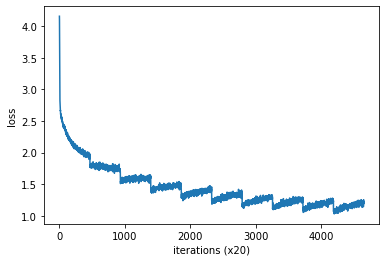

In [7]:
model = CBOW(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs

In [10]:
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)

In [11]:
if __name__ == '__main__':
    pkl_file = 'cbow_params.pkl'

    with open(pkl_file, 'rb') as f:
        params = pickle.load(f)
        word_vecs = params['word_vecs']
        word_to_id = params['word_to_id']
        id_to_word = params['id_to_word']

    queries = ['you', 'year', 'car', 'toyota']

    for query in queries:
        most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

    analogy('king', 'man', 'queen', word_to_id, id_to_word, word_vecs)
    analogy('take', 'took', 'go', word_to_id, id_to_word, word_vecs)
    analogy('car', 'cars', 'child', word_to_id, id_to_word, word_vecs)
    analogy('good', 'better', 'bad', word_to_id, id_to_word, word_vecs)

NameError: name 'most_similar' is not defined